In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

C:\Users\Albert\Anaconda3\envs\tf-gpu\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = web.DataReader(['SPY'], data_source='yahoo', start='1994')

In [3]:
print(df)

Attributes   Adj Close       Close        High         Low        Open  \
Symbols            SPY         SPY         SPY         SPY         SPY   
Date                                                                     
1994-01-03   27.466513   46.468750   46.656250   46.406250   46.593750   
1994-01-04   27.577339   46.656250   46.656250   46.468750   46.531250   
1994-01-05   27.632751   46.750000   46.781250   46.531250   46.718750   
1994-01-06   27.632751   46.750000   46.843750   46.687500   46.812500   
1994-01-07   27.799011   47.031250   47.062500   46.718750   46.843750   
...                ...         ...         ...         ...         ...   
2022-11-28  395.910004  395.910004  400.809998  395.109985  399.089996   
2022-11-29  395.230011  395.230011  397.299988  393.299988  396.049988   
2022-11-30  407.679993  407.679993  407.679993  393.480011  395.489990   
2022-12-01  407.380005  407.380005  410.000000  404.750000  408.769989   
2022-12-02  406.910004  406.910004  40

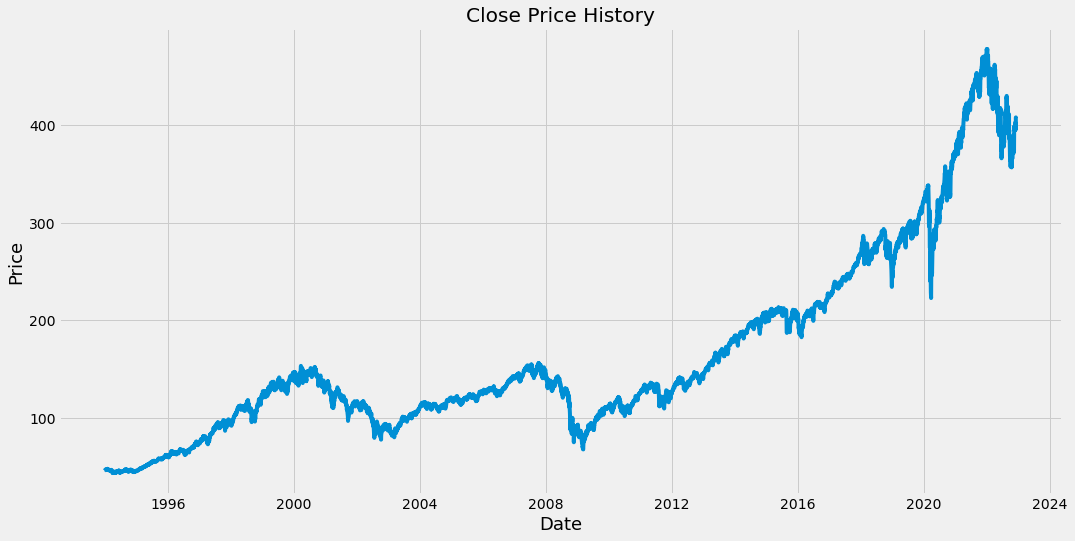

In [4]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show()

In [5]:
data=df['Close']#selecting end point data
dataset = data.values #converting to numpy values

training_data_len = math.ceil(len(dataset)*.8) #selecting 80% of data for training, ceil is for rounding.

dataset

array([[ 46.46875   ],
       [ 46.65625   ],
       [ 46.75      ],
       ...,
       [407.67999268],
       [407.38000488],
       [406.91000366]])

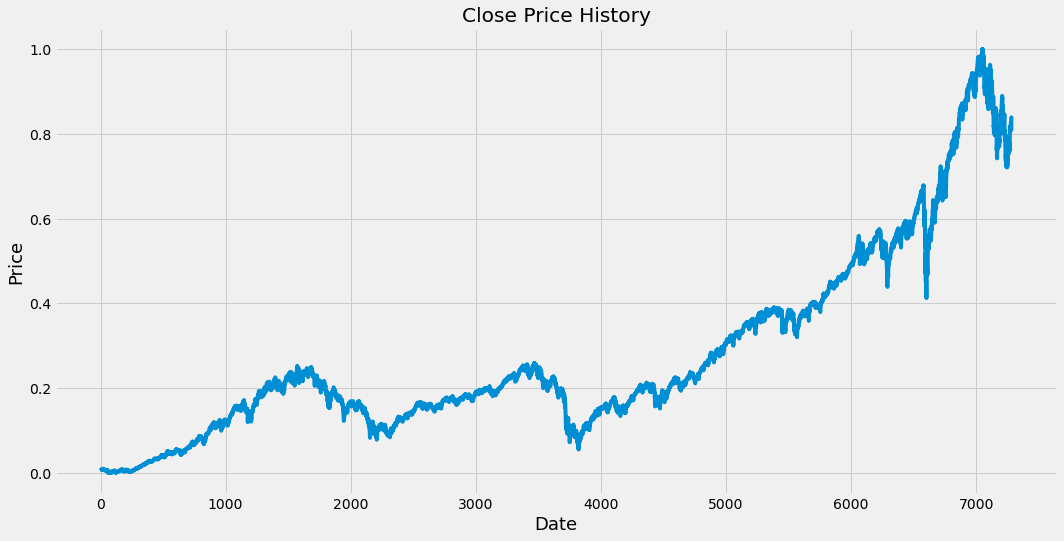

In [6]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(scaled_data)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show()


In [7]:
#Create a training dataset
train_data = scaled_data[0:training_data_len, :] #From 0 to training data length, all columns

#X train y train
x_train = []
y_train = []

for i in range (100, len(train_data)):
    x_train.append(train_data[i-100:i,0])
    y_train.append(train_data[i,0])
    if i <= 100:
        print(x_train)
        print(y_train)
        print()

[array([0.00590705, 0.00633927, 0.00655538, 0.00655538, 0.00720372,
       0.00850039, 0.00828428, 0.00792409, 0.00763594, 0.00806816,
       0.00806816, 0.00821224, 0.00792409, 0.00821224, 0.00799613,
       0.0075639 , 0.0075639 , 0.00785205, 0.00886057, 0.00914872,
       0.00994113, 0.00936483, 0.01008521, 0.00958095, 0.00705964,
       0.0075639 , 0.00763594, 0.00806816, 0.00713168, 0.00749187,
       0.00763594, 0.00821224, 0.0081402 , 0.00749187, 0.00684353,
       0.00792409, 0.00763594, 0.0061952 , 0.00669946, 0.00669946,
       0.00626724, 0.00641131, 0.00612316, 0.00641131, 0.00698761,
       0.00655538, 0.00705964, 0.0061952 , 0.0067715 , 0.00691557,
       0.00684353, 0.00770798, 0.00770798, 0.00705964, 0.0067715 ,
       0.00705964, 0.00698761, 0.00569094, 0.00468242, 0.00482649,
       0.00273741, 0.00129667, 0.00158482, 0.        , 0.00208908,
       0.00208908, 0.00259334, 0.00180093, 0.00223315, 0.00208908,
       0.0015488 , 0.00158482, 0.00158482, 0.00090046, 0.0010

In [8]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [24]:
#Reshape the data, the model needs the data to be in 3D - samples, timestamps, features
x_train = np.reshape (x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape


(5727, 100, 1)

In [10]:
#build the LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
#Compile the model
model.compile(optimizer = 'adam', loss='mean_squared_error')

In [12]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

5727/5727 [==============================] - 65s 10ms/step - loss: 1.1964e-04


In [13]:
#Create the testing data set
test_data = scaled_data[training_data_len - 100:,:]
#Create datasets X_test and Y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(100, len(test_data)):
    x_test.append(test_data[i-100:i,0])
    

In [14]:
#convert the data to a numpy array
x_test = np.array(x_test)


In [15]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
#Get the predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [17]:
#Get the root mean squred erro( RMSE) standard deviation of the residuals - lower number is better

rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse


14.30145686013358

In [18]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
valid

C:\Users\Albert\AppData\Local\Temp\ipykernel_11716\4228077761.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Symbols,SPY,Predictions
Date,,
2017-02-23,236.440002,228.641495
2017-02-24,236.740005,228.895691
2017-02-27,237.110001,229.143814
2017-02-28,236.470001,229.446121
2017-03-01,239.779999,229.464157
...,...,...
2022-11-28,395.910004,379.072479
2022-11-29,395.230011,377.611267
2022-11-30,407.679993,375.999146


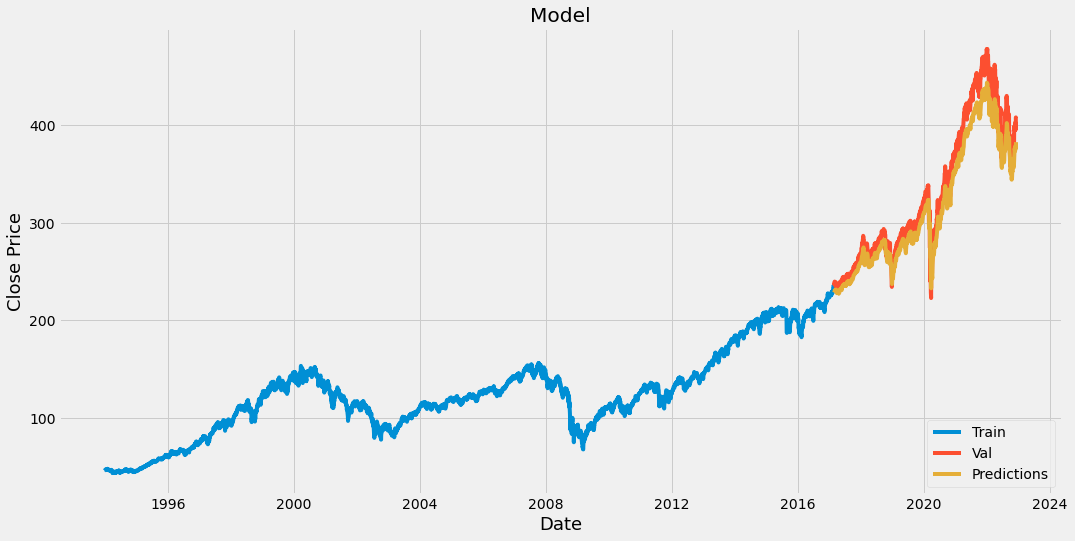

In [19]:
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.plot(train)
plt.plot(valid[['SPY','Predictions']])
plt.legend(['Train', 'Val','Predictions'], loc = 'lower right')
plt.show()

In [20]:
#Show the valid and predicted prices
valid

Symbols,SPY,Predictions
Date,,
2017-02-23,236.440002,228.641495
2017-02-24,236.740005,228.895691
2017-02-27,237.110001,229.143814
2017-02-28,236.470001,229.446121
2017-03-01,239.779999,229.464157
...,...,...
2022-11-28,395.910004,379.072479
2022-11-29,395.230011,377.611267
2022-11-30,407.679993,375.999146


In [21]:
spy_quote = web.DataReader('SPY', data_source='yahoo', start = 1994, end = '2022-12-04')
#Create a new data frame
new_df = spy_quote['Close']
#Get the last 100 days closing days values and conver to np array
last_100_days = data[-100:].values


In [22]:
#Scale the data to be values to be between 0 and 1
last_100_days_scaled = scaler.transform(last_100_days)
#create an empty list
X_test = []
#Append last 100 days
X_test.append(last_100_days_scaled)
#Convert the X_test data set to a numpy array
X_test=np.array(X_test)
#Reshape the data to be 3D
X_test =  np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scale price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[383.87863]]
